## **Regressions:**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Proof of Concept: A basic multiple regression on unit cell volume on ~300 materials.**

In [17]:
stable_mats_volumes = pd.read_excel("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/only_stable_mp_matches.xlsx")

In [18]:
# Goes from a list stored in a df to just the value inside.
fixed_row_volume = []
for index, row in stable_mats_volumes.iterrows():
    volume_str = row['unit_cell_volumes']
    if len(volume_str) > 2:
        fixed_row_volume.append(row['unit_cell_volumes'][1:-1])
    else:
        fixed_row_volume.append(np.nan)
stable_mats_volumes['unit_cell_volumes'] = fixed_row_volume

# Only takes non-NAN values
stable_mats_volumes = stable_mats_volumes[stable_mats_volumes['unit_cell_volumes'].notna()]

In [19]:
stable_mats_volumes.head(50)

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,material_dict_queried,matches_by_element,matches_by_dict,mp_ids,unit_cell_volumes
10,"[12795, 12796, 19273]",Ag1La1,Ag1La1,"{'Ag': 1.0, 'La': 1.0}",1.2,1.073333,0.098432,3,"{'Ag': 1.0, 'La': 1.0}","['LaAg', 'LaAg2']",['LaAg'],[MPID(mp-1948)],55.368048972335835
14,"[16568, 20134, 20203, 23088, 25172]",Ag1Sn1Se2,Ag1Sn1Se2,"{'Ag': 1.0, 'Se': 2.0, 'Sn': 1.0}",4.71,4.664000,0.059532,5,"{'Ag': 1.0, 'Se': 2.0, 'Sn': 1.0}","['Ag8SnSe6', 'Ag2SnSe3', 'AgSnSe2']",['AgSnSe2'],[MPID(mp-1229011)],92.3053035439403
15,[12811],Ag1Te3,Ag1Te3,"{'Ag': 1.0, 'Te': 3.0}",2.6,2.600000,0.000000,1,"{'Ag': 1.0, 'Te': 3.0}","['AgTe', 'AgTe3', 'Ag2Te']",['AgTe3'],[MPID(mp-28246)],113.88237041063722
18,[14851],Ag2F1,Ag2F1,"{'Ag': 2.0, 'F': 1.0}",0.066,0.066000,0.000000,1,"{'Ag': 2.0, 'F': 1.0}","['AgF3', 'AgF2', 'AgF', 'Ag2F', 'Ag2F5']",['Ag2F'],[MPID(mp-1391)],44.481336035584704
24,"[11237, 11360]",Ag5Pb2O6,Ag5Pb2O6,"{'Ag': 5.0, 'O': 6.0, 'Pb': 2.0}",0.0524,0.050200,0.002200,2,"{'Ag': 5.0, 'O': 6.0, 'Pb': 2.0}",['Ag5(PbO3)2'],['Ag5(PbO3)2'],[MPID(mp-22286)],198.65882309090384
29,"[11361, 12806, 14853, 20122, 20387, 20388, 224...",Ag7N1O11,Ag7N1O11,"{'Ag': 7.0, 'N': 1.0, 'O': 11.0}",1.04,1.038125,0.004961,8,"{'Ag': 7.0, 'N': 1.0, 'O': 11.0}","['AgNO3', 'Ag7NO11']",['Ag7NO11'],[MPID(mp-37695)],241.20675131700725
30,"[12165, 12547, 12815, 14875, 14876, 18225, 198...",Al1,Al1,{'Al': 1.0},1.8,1.246630,0.188589,10,{'Al': 1.0},['Al'],['Al'],[MPID(mp-134)],16.471717630914863
32,[19340],Al1Sc1Au2,Al1Sc1Au2,"{'Al': 1.0, 'Au': 2.0, 'Sc': 1.0}",4.4,4.400000,0.000000,1,"{'Al': 1.0, 'Au': 2.0, 'Sc': 1.0}",['ScAlAu2'],['ScAlAu2'],[MPID(mp-10873)],70.25506896854472
33,"[12812, 14864]",Al1Au4,Al1Au4,"{'Al': 1.0, 'Au': 4.0}",0.7,0.550000,0.150000,2,"{'Al': 1.0, 'Au': 4.0}","['AlAu4', 'AlAu2', 'AlAu', 'Al2Au']",['AlAu4'],[MPID(mp-1490)],339.8150231225442
35,[21233],Ba1Al1Ge1,Ba1Al1Ge1,"{'Al': 1.0, 'Ba': 1.0, 'Ge': 1.0}",6.3,6.300000,0.000000,1,"{'Al': 1.0, 'Ba': 1.0, 'Ge': 1.0}","['Ba5Al2Ge7', 'Ba7Al4Ge9', 'BaAlGe', 'Ba3(AlGe...",['BaAlGe'],[MPID(mp-13272)],85.77244413152933


C:\Users\Droor\AppData\Local\Temp\ipykernel_7300\3591082546.py:10: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=stable_mats_volumes, x=volume, y=average_tc, cmap='viridis', shade=True,
C:\Users\Droor\AppData\Local\Temp\ipykernel_7300\3591082546.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=stable_mats_volumes, x=volume, y=average_tc, cmap='viridis', shade=True,


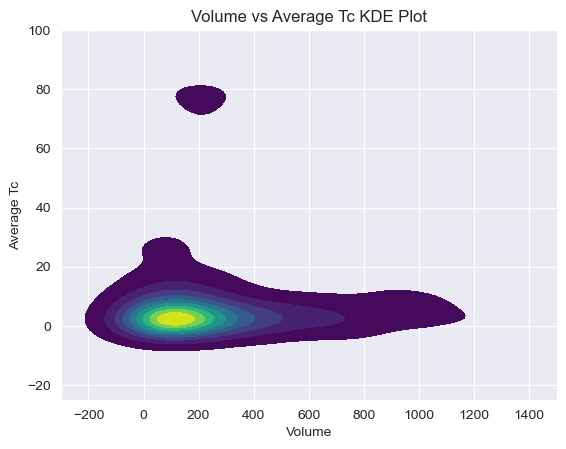

In [20]:
# Convert 'unit_cell_volumes' and 'average_Tc' columns to numeric
stable_mats_volumes['unit_cell_volumes'] = pd.to_numeric(stable_mats_volumes['unit_cell_volumes'], errors='coerce')
stable_mats_volumes['average_Tc'] = pd.to_numeric(stable_mats_volumes['average_Tc'], errors='coerce')

# First, let's plot volume - Tc in a KDE plot.
volume = stable_mats_volumes['unit_cell_volumes']
average_tc = stable_mats_volumes['average_Tc']

# Create the KDE plot
sns.kdeplot(data=stable_mats_volumes, x=volume, y=average_tc, cmap='viridis', shade=True,
            shade_lowest=False, levels=10, bw_method=0.3)

# Set the range of the plot so that the y only goes up to 100, and x goes up to 1500
plt.ylim(-25, 100)
plt.xlim(-300, 1500)
# Set plot labels and title
plt.xlabel('Volume')
plt.ylabel('Average Tc')
plt.title('Volume vs Average Tc KDE Plot')

# Show the plot
plt.show()


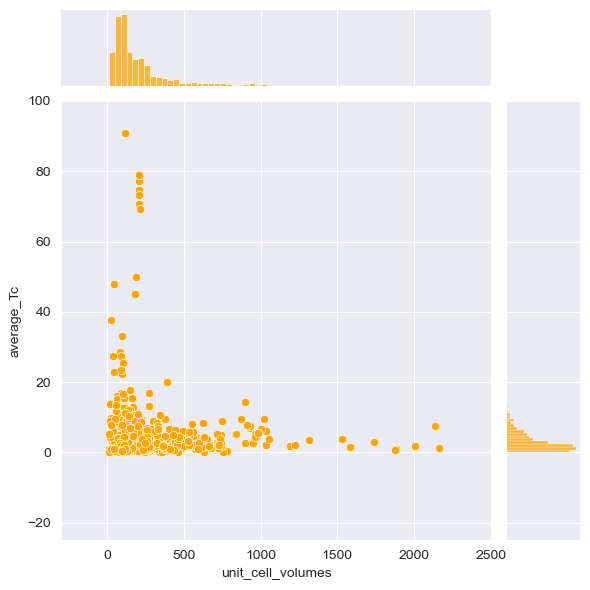

In [21]:
# Create a jointplot similar to the KDE plot above, but with a scatterplot instead of a KDE plot
# Create the same plot as above but limit x to 2500 and y to 100
sns.jointplot(data=stable_mats_volumes, x=volume, y=average_tc, kind='scatter', xlim=(-300, 2500), ylim=(-25, 100), color='orange')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

def train_evaluate_regression_model(X, y, model):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train.values.reshape(-1, 1), y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test.values.reshape(-1, 1))

    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    return rmse, r2

# Get lists of the variables.
volume = stable_mats_volumes['unit_cell_volumes'][:400]
average_tc = stable_mats_volumes['average_Tc'][:400]

# Define the regression models
linear_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
tree_reg = DecisionTreeRegressor()
XGBRegressor = XGBRegressor()

# Train and evaluate the models using the defined function
linear_rmse, linear_r2 = train_evaluate_regression_model(volume, average_tc, linear_reg)
knn_rmse, knn_r2 = train_evaluate_regression_model(volume, average_tc, knn_reg)
tree_rmse, tree_r2 = train_evaluate_regression_model(volume, average_tc, tree_reg)
XGBRegressor_rmse, XGBRegressor_r2 = train_evaluate_regression_model(volume, average_tc, XGBRegressor)

# Store the evaluation metrics.
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("R2 Score:", linear_r2)
print()

print("K-Nearest Neighbors Regression:")
print("RMSE:", knn_rmse)
print("R2 Score:", knn_r2)
print()

print("Decision Tree Regression:")
print("RMSE:", tree_rmse)
print("R2 Score:", tree_r2)
print()

print("XGBoost Regression:")
print("RMSE:", XGBRegressor_rmse)
print("R2 Score:", XGBRegressor_r2)

Linear Regression:
RMSE: 13.911165676365338
R2 Score: 0.0011955096265739984

K-Nearest Neighbors Regression:
RMSE: 11.261067788720164
R2 Score: 0.3454955766944354

Decision Tree Regression:
RMSE: 15.643268171983234
R2 Score: -0.2630147465021424

XGBoost Regression:
RMSE: 15.375898801811205
R2 Score: -0.2202096752893632


There is no obvious way to incorporate the statistics of highest Tc and standard deviation. For one, std. dev is often zero (since there is usually only one match in SuperCon). Also, highest Tc and avg Tc are near perfect correlates of each other.